In [15]:
# 한글 폰트 깨지는것을 막아줌 (windows)
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 필요한 패키지 및 라이브러리

In [23]:
import pandas as pd 
import numpy as np

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# 스케일링 (PCA, preprocessing)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [116]:
df = pd.read_csv("편의시설 변경 버전.csv")
df

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,장보기시설,쇼핑시설,유흥주점,헬스시설,다방,커피숍,패스트푸드,편의점,마트,음식점
0,청운동,0,7,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,11.0
1,신교동,0,0,0,0,0,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,효자동,0,2,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0
4,창성동,0,2,2,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,2,9,0,8,...,0.0,0.0,0.0,10.0,1.0,34.0,2.0,19.0,0.0,133.0
461,암사동,1,29,3,8,3,2,23,0,22,...,4.0,0.0,2.0,19.0,1.0,64.0,9.0,36.0,2.0,283.0
462,성내동,1,54,3,14,4,4,35,19,34,...,3.0,2.0,3.0,38.0,2.0,127.0,23.0,57.0,4.0,698.0
463,천호동,3,51,3,7,3,5,47,6,37,...,3.0,3.0,15.0,18.0,0.0,122.0,24.0,74.0,4.0,710.0


## 인프라(컬럼) 묶기
### 5개로 묶어보고 점점 디테일하게 바꿔보자!

['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '장보기시설', '쇼핑시설', '유흥주점', '헬스시설', '다방',
       '커피숍', '패스트푸드', '편의점', '마트']

유흥업소는 많이 없어야 좋은거 아닌가? 나중에 얘만 반대로 생각하자..

치안 : (경찰서, 119안전센터, '치안센터')  
여가 : ('헬스시설', '영화상영관','공원수')  
일반음식점 : ('다방', '커피숍', '패스트푸드','음식점수')  
보건 : ('병원', '약국', '의원')  
편의시설 : ('마트', '편의점')  
대중교통 : ('지하철역', '버스정류소')  

In [117]:
df['치안'] = df['경찰서'] + df['119안전센터'] + df['치안센터']
df['여가'] = df['헬스시설'] + df['영화상영관'] + df['공원수']
df['카페'] = df['다방'] + df['커피숍']
df['일반음식점'] = df['패스트푸드'] + df['음식점수']
df['보건'] = df['병원'] + df['약국'] + df['의원']
df['편의시설'] = df['마트'] + df['편의점']
df['대중교통'] = df['지하철역'] + df['버스정류소']

In [125]:
df = df[['법정동명','치안','여가','일반음식점','보건','편의시설','대중교통', '카페']]
df

,법정동명,치안,여가,일반음식점,보건,편의시설,대중교통,카페
0,청운동,0,0.0,16.0,0,1.0,7,8.0
1,신교동,1,0.0,11.0,1,0.0,0,1.0
2,궁정동,1,0.0,4.0,0,0.0,1,1.0
3,효자동,0,0.0,16.0,0,0.0,2,4.0
4,창성동,0,1.0,23.0,4,2.0,2,2.0
...,...,...,...,...,...,...,...,...
460,둔촌동,2,11.0,192.0,34,19.0,40,35.0
461,암사동,3,20.0,431.0,92,38.0,30,65.0
462,성내동,3,57.0,1017.0,170,61.0,55,129.0
463,천호동,4,24.0,1048.0,205,78.0,54,122.0


In [184]:
df1 = df.drop(axis=1, columns=['법정동명'])

In [185]:
df1

,치안,여가,일반음식점,보건,편의시설,대중교통,카페
0,0,0.0,16.0,0,1.0,7,8.0
1,1,0.0,11.0,1,0.0,0,1.0
2,1,0.0,4.0,0,0.0,1,1.0
3,0,0.0,16.0,0,0.0,2,4.0
4,0,1.0,23.0,4,2.0,2,2.0
...,...,...,...,...,...,...,...
460,2,11.0,192.0,34,19.0,40,35.0
461,3,20.0,431.0,92,38.0,30,65.0
462,3,57.0,1017.0,170,61.0,55,129.0
463,4,24.0,1048.0,205,78.0,54,122.0


qcut으로 각 컬럼별로 데이터를 5개의 클래스로 나누기

In [186]:
df1['치안'].value_counts()

치안
0     228
1     121
2      48
3      32
4      11
7       7
6       7
5       6
10      2
8       2
11      1
Name: count, dtype: int64

In [187]:
for col in df1.columns:
    df1[col] = df1[col].astype(int)
    

In [188]:
df1

,치안,여가,일반음식점,보건,편의시설,대중교통,카페
0,0,0,16,0,1,7,8
1,1,0,11,1,0,0,1
2,1,0,4,0,0,1,1
3,0,0,16,0,0,2,4
4,0,1,23,4,2,2,2
...,...,...,...,...,...,...,...
460,2,11,192,34,19,40,35
461,3,20,431,92,38,30,65
462,3,57,1017,170,61,55,129
463,4,24,1048,205,78,54,122


In [189]:
for col in df1.columns:
    df1[col] = pd.qcut(df1[col], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

ValueError: Bin labels must be one fewer than the number of bin edges

In [193]:
df1['일반음식점']

0        16
1        11
2         4
3        16
4        23
       ... 
460     192
461     431
462    1017
463    1048
464      63
Name: 일반음식점, Length: 465, dtype: int32

In [211]:
df1['치안'].value_counts()

치안
0     228
1     121
2      48
3      32
4      11
7       7
6       7
5       6
10      2
8       2
11      1
Name: count, dtype: int64

In [209]:
df1['여가'].value_counts()

여가
0     167
1      61
2      27
3      19
4      14
     ... 
33      1
27      1
32      1
39      1
57      1
Name: count, Length: 63, dtype: int64

In [213]:
pd.qcut(df1['대중교통'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop').value_counts()

대중교통
1    111
5     92
4     91
3     90
2     81
Name: count, dtype: int64

In [202]:
df1['일반음식점'].describe()

count     465.000000
mean      272.270968
std       426.238322
min         0.000000
25%        35.000000
50%       103.000000
75%       325.000000
max      3150.000000
Name: 일반음식점, dtype: float64

In [208]:
categorized, bins = pd.qcut(df1['일반음식점'], 5, labels=[1, 2, 3, 4, 5], retbins=True)

In [203]:
df1

,치안,여가,일반음식점,보건,편의시설,대중교통,카페
0,0,0,16,0,1,7,8
1,1,0,11,1,0,0,1
2,1,0,4,0,0,1,1
3,0,0,16,0,0,2,4
4,0,1,23,4,2,2,2
...,...,...,...,...,...,...,...
460,2,11,192,34,19,40,35
461,3,20,431,92,38,30,65
462,3,57,1017,170,61,55,129
463,4,24,1048,205,78,54,122


In [131]:
temp = pd.qcut(df1['일반음식점'], 5, labels=[1, 2, 3, 4, 5])

In [132]:
temp.value_counts()

일반음식점
1    99
4    93
5    93
2    90
3    90
Name: count, dtype: int64

MinMaxScaler는 이상하게나옴.
StandardScaler 해보자.

In [120]:
df1 = MinMaxScaler().fit_transform(df1)

In [121]:
df_standard = StandardScaler().fit_transform(df1)
df_standard = pd.DataFrame(df_standard)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.66,-0.53,-0.64,-0.50,-0.60,-0.67,-0.61,-0.27
25%,-0.66,-0.53,-0.56,-0.48,-0.55,-0.59,-0.52,-0.27
50%,-0.07,-0.43,-0.40,-0.37,-0.43,-0.45,-0.38,-0.27
75%,-0.07,0.10,0.12,0.04,0.09,0.26,0.09,-0.18
max,5.73,6.99,6.76,9.07,6.61,6.82,8.15,12.84


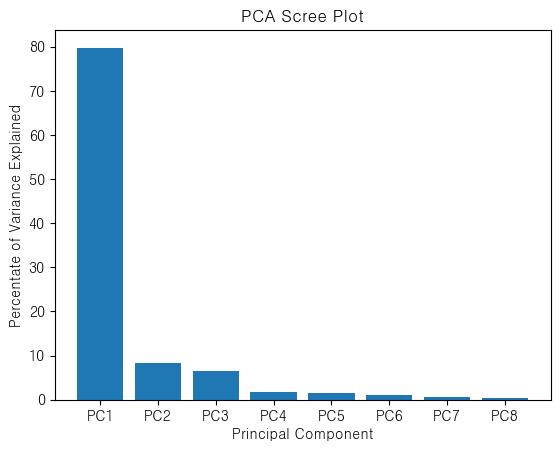

0    0.797560
1    0.880371
2    0.945339
3    0.963072
4    0.977748
5    0.989132
6    0.995093
7    1.000000
dtype: float64

In [122]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(df_standard)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [123]:
pca = PCA(n_components=4)
pc = pca.fit_transform(df_standard)
pcd = pd.DataFrame(pc)
pcd

,0,1,2,3
0,-1.449440,0.162670,-0.050067,-0.062799
1,-1.388443,-0.047102,0.182034,0.273078
2,-1.389523,-0.056735,0.200159,0.262648
3,-1.540409,0.203177,-0.085065,0.013477
4,-1.477971,0.200493,-0.110121,0.041705
...,...,...,...,...
460,0.243816,-0.603169,0.329879,-0.025461
461,1.540094,-0.576184,-0.074248,0.216632
462,4.191862,-0.522678,-1.300522,-0.135236
463,4.416122,-0.019106,-0.040533,0.052357


In [77]:
from sklearn.cluster import KMeans

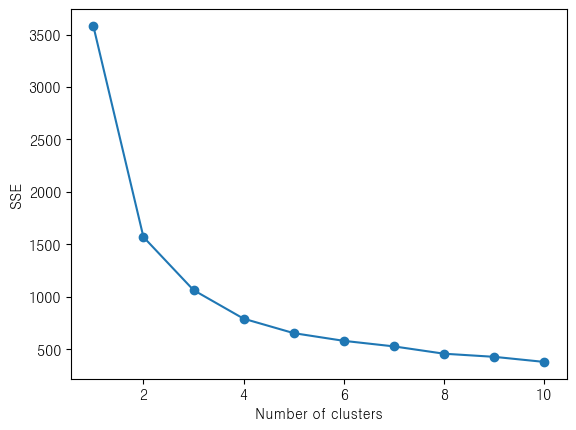

In [124]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pcd)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()